# Project: Data Analysis with TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset provides details on various movies such as rating, popularity, budget, and cast. We will be using this data to analyze trends to determine the relationships between different variables such as rating and budget of the listed movies. Additionally, we will be exploring the relationship between runtime and popularity of the listed movies. 

### Question(s) for Analysis

The two main questions that will be answered in this report are:

1. Does a movie budget affect it's rating?

2. Does the popularity of a movie increase or decrease depending on how long the movie is?

In [1]:
# importing packages to explore our dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load data 
df = pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Let's get some general info about our dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

From this output we can tell that there are 10866 rows, 21 total columns, and 9 columns with null values. Now let's take a look at the shape of our dataset.

In [4]:
df.shape

(10866, 21)

Looks like we have a the same information given to us by the df.info() output with regards to the number of rows and columns. Now let's take a look at some descriptive statistics to get a general idea of some of the relationships we'll be exploring later on in this report.

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From our descriptive statistics, we can see the mean budget is a little less than 15 million and the mean runtime is about an hour and 42 minutes. We'll explore this dataset further later on in this report.


### Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Let's go ahead and remove an unneccesary columns and resolve any issues with our data that could hinder an accurate analysis. 

In [7]:
# Below are the columns that have been dropped from our dataset

df.drop(['id','imdb_id','revenue','cast','homepage','director','tagline','genres','budget_adj','keywords','overview','genres','production_companies','revenue_adj'],axis=1,inplace=True)

Because we will be exploring the relationship betwen budget and rating as well as the relationship between runtime and popularity, we've gotten rid of any unncessary columns. Let's take a look at what our dataset looks like now.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 679.2+ KB


In [9]:
df.head()

,popularity,budget,original_title,runtime,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,Jurassic World,124,6/9/15,5562,6.5,2015
1,28.419936,150000000,Mad Max: Fury Road,120,5/13/15,6185,7.1,2015
2,13.112507,110000000,Insurgent,119,3/18/15,2480,6.3,2015
3,11.173104,200000000,Star Wars: The Force Awakens,136,12/15/15,5292,7.5,2015
4,9.335014,190000000,Furious 7,137,4/1/15,2947,7.3,2015


Now let's check our data for duplicates and drop them if neccesary.

In [10]:
df.duplicated().sum()

1

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

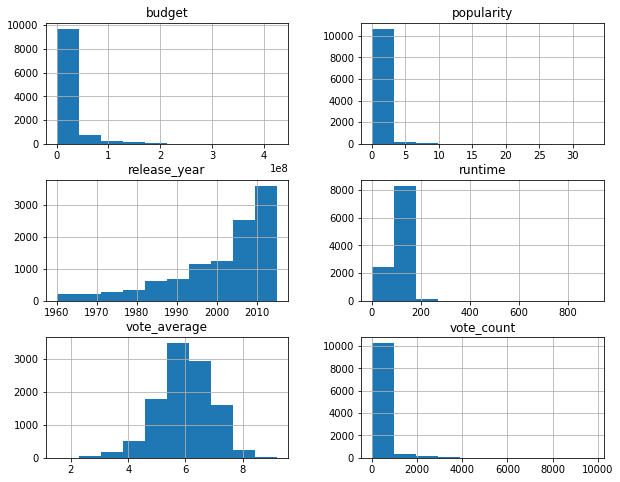

In [13]:
df.hist(figsize=(10,8));

Now that our data is free of duplicates and narrowed down to what we need to answer our two main questions let's begin exploring our dataset further.

<a id='eda'></a>
## Exploratory Data Analysis

### Does a movie's budget affect its rating (vote_average)?

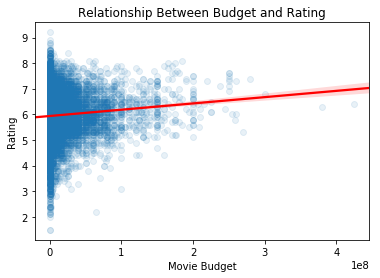

In [14]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

# create scatter plot -- this section has changed to a regplot
# plt.scatter(df['budget'],df['vote_average'])
# plt.show()

# creation of regplot

sns.regplot(x="budget", y="vote_average", 
            data=df, scatter_kws={'alpha':0.1},
            line_kws={"color":"red"});

#x & y labels of scatter plot
plt.xlabel('Movie Budget')
plt.ylabel('Rating')

#title of scatter plot
plt.title('Relationship Between Budget and Rating');

Based on this regplot we can see the majority of movies did not have a large budget yet they still managed to get a high or low rating. Even with the larger budgets, w can see it had minimal effect on rating. This chart showed us for information about all 10,866 entries but what about the top 10 most expensive movies,the top 200 highest rated movies, and bottom 200 lowest rated movies?

In [15]:
df_expensive = df.nlargest(n=10, columns=['budget','vote_average'])

Starting with the top 10 most expensive movies, we can see that outlier in our previous graph below as well as a list of the most expensives movies in our dataset.

In [16]:
df['budget'].max()

425000000

In [17]:
df_expensive

,popularity,budget,original_title,runtime,release_date,vote_count,vote_average,release_year
643,6.052479,250000000,X-Men: Days of Future Past,131,5/15/14,4006,7.6,2014
5431,4.310786,250000000,The Hobbit: The Desolation of Smaug,161,12/11/13,2952,7.6,2013
4363,6.591277,250000000,The Dark Knight Rises,165,7/16/12,6723,7.5,2012
2244,0.250540,425000000,The Warrior's Way,100,12/2/10,74,6.4,2010
3375,4.955130,380000000,Pirates of the Caribbean: On Stranger Tides,136,5/11/11,3180,6.3,2011
7387,4.965391,300000000,Pirates of the Caribbean: At World's End,169,5/19/07,2626,6.8,2007
14,5.944927,280000000,Avengers: Age of Ultron,141,4/22/15,4304,7.4,2015
6570,1.957331,270000000,Superman Returns,154,6/28/06,834,5.3,2006
7394,2.520912,258000000,Spider-Man 3,139,5/1/07,2083,5.8,2007
5508,1.214510,255000000,The Lone Ranger,149,7/3/13,1607,6.0,2013


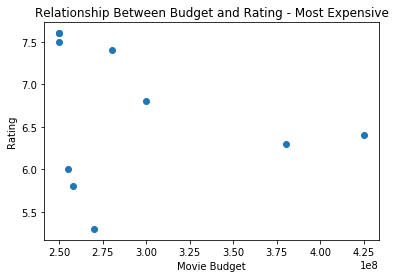

In [18]:
#x & y labels of scatter plot
plt.xlabel('Movie Budget')
plt.ylabel('Rating')

#title of scatter plot
plt.title('Relationship Between Budget and Rating - Most Expensive')

#create scatter plot
plt.scatter(df_expensive['budget'],df_expensive['vote_average'])
plt.show()

Looks like budget does not affect the rating for the most expensive movies. Let's check the top 200 highest rated movies according to voting average.

In [19]:
df_top = df.nlargest(n=200, columns=['vote_average','budget'])

In [20]:
df['vote_average'].max()

9.1999999999999993

In [21]:
df_top

,popularity,budget,original_title,runtime,release_date,vote_count,vote_average,release_year
2875,8.466668,185000000,The Dark Knight,152,7/16/08,8432,8.1,2008
655,3.990452,178000000,Edge of Tomorrow,113,5/27/14,3267,7.7,2014
9,6.326804,175000000,Inside Out,94,6/9/15,3935,8.0,2015
630,14.311205,170000000,Guardians of the Galaxy,121,7/30/14,5612,7.9,2014
629,24.949134,165000000,Interstellar,169,11/5/14,6498,8.0,2014
635,8.691294,165000000,Big Hero 6,102,10/24/14,4185,7.8,2014
1919,9.363643,160000000,Inception,148,7/14/10,9767,7.9,2010
663,3.489106,145000000,How to Train Your Dragon 2,102,6/12/14,2152,7.7,2014
3374,5.711315,125000000,Harry Potter and the Deathly Hallows: Part 2,130,7/7/11,3750,7.7,2011
2214,0.757082,120000000,The Pacific,540,5/16/10,183,7.8,2010


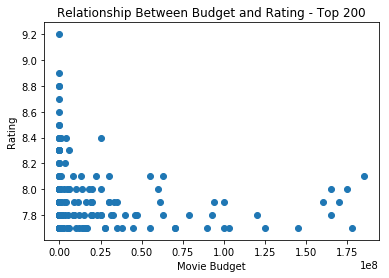

In [22]:
#x & y labels of scatter plot
plt.xlabel('Movie Budget')
plt.ylabel('Rating')

#title of scatter plot
plt.title('Relationship Between Budget and Rating - Top 200')

#create scatter plot
plt.scatter(df_top['budget'],df_top['vote_average'])
plt.show()

Looks like the highest rated movies didn't have that many people voting, weren't as popular, and didn't have a budget. These results may not be giving us an accurate reading, therefore let's set some parameters to understand the data a little better.

In [23]:
# mean number of vote_count 

df['vote_count'].mean()

217.39963184537507

If the movie had more than 200 we'll use it to explore the relationship between budget and rating.

In [24]:
df_accurate_rating = df[df['vote_count'] >= 200]

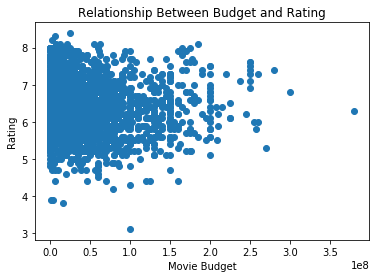

In [25]:
#x & y labels of scatter plot
plt.xlabel('Movie Budget')
plt.ylabel('Rating')

#title of scatter plot
plt.title('Relationship Between Budget and Rating')

#create scatter plot
plt.scatter(df_accurate_rating['budget'],df_accurate_rating['vote_average'])
plt.show()

In [26]:
df_expensive = df_accurate_rating.nlargest(n=10, columns=['budget','vote_average'])

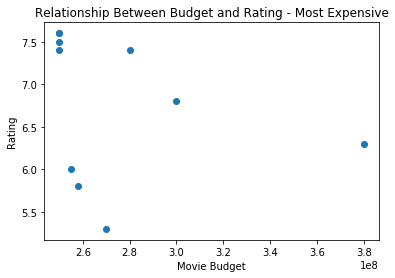

In [27]:
#x & y labels of scatter plot
plt.xlabel('Movie Budget')
plt.ylabel('Rating')

#title of scatter plot
plt.title('Relationship Between Budget and Rating - Most Expensive')

#create scatter plot
plt.scatter(df_expensive['budget'],df_expensive['vote_average'])
plt.show()

In [28]:
df_top = df_accurate_rating.nlargest(n=200, columns=['vote_average','budget'])

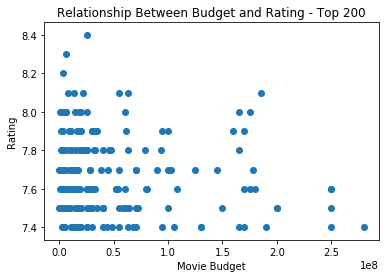

In [29]:
#x & y labels of scatter plot
plt.xlabel('Movie Budget')
plt.ylabel('Rating')

#title of scatter plot
plt.title('Relationship Between Budget and Rating - Top 200')

#create scatter plot
plt.scatter(df_top['budget'],df_top['vote_average'])
plt.show()

In [30]:
df_bottom = df.nsmallest(n=200, columns=['vote_average','budget'])

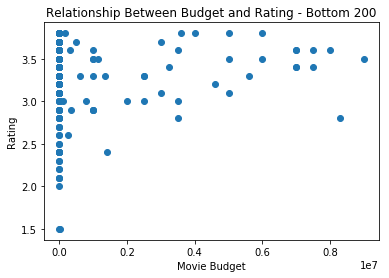

In [31]:
#x & y labels of scatter plot
plt.xlabel('Movie Budget')
plt.ylabel('Rating')

#title of scatter plot
plt.title('Relationship Between Budget and Rating - Bottom 200')

#create scatter plot
plt.scatter(df_bottom['budget'],df_bottom['vote_average'])
plt.show()

Although these results are similar when we adjusted for the mean vote count, excluding the top 200 range, they show that a higher budget does not neccesarily mean a better rating. Now let's move on to understanding the relationship between popularity and runtime.

### Does the popularity of a movie increase or decrease depending on how long the movie is?

Let's begin by comparing the relationship between runtime and popularity in a scatter plot for all the movies in our dataset.

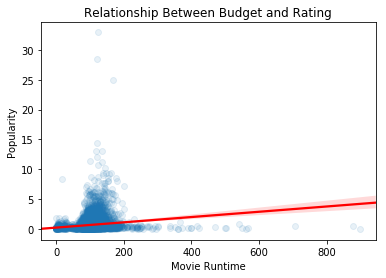

In [32]:
# creation of regplot

sns.regplot(x="runtime", y="popularity", 
            data=df, scatter_kws={'alpha':0.1},
            line_kws={"color":"red"});

#x & y labels of scatter plot
plt.xlabel('Movie Runtime')
plt.ylabel('Popularity')

#title of scatter plot
plt.title('Relationship Between Budget and Rating');

Looks like movies that are over 200 minutes long are not very popular. What about the top 200 highest rated movies and bottom 200 lowest rated movies? What is their runtime?

In [33]:
df_top

,popularity,budget,original_title,runtime,release_date,vote_count,vote_average,release_year
14,5.944927,280000000,Avengers: Age of Ultron,141,4/22/15,4304,7.4,2015
643,6.052479,250000000,X-Men: Days of Future Past,131,5/15/14,4006,7.6,2014
1923,4.840588,250000000,Harry Potter and the Deathly Hallows: Part 1,146,10/17/10,3467,7.4,2010
4363,6.591277,250000000,The Dark Knight Rises,165,7/16/12,6723,7.5,2012
5431,4.310786,250000000,The Hobbit: The Desolation of Smaug,161,12/11/13,2952,7.6,2013
3,11.173104,200000000,Star Wars: The Force Awakens,136,12/15/15,5292,7.5,2015
1930,2.711136,200000000,Toy Story 3,103,6/16/10,2924,7.5,2010
5435,3.877342,190000000,Star Trek Into Darkness,132,5/5/13,3363,7.4,2013
2875,8.466668,185000000,The Dark Knight,152,7/16/08,8432,8.1,2008
2876,5.678119,180000000,WALLÂ·E,98,6/22/08,4209,7.6,2008


In [34]:
df_top['runtime'].mean()

126.80500000000001

The mean runtime for a the top 200 highest rated movies is 2 hours and 11 minutes.

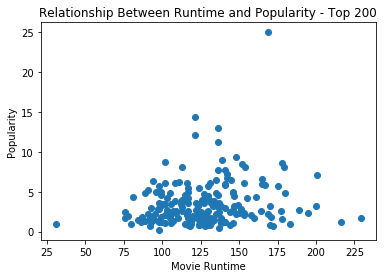

In [35]:
#x & y labels of scatter plot
plt.xlabel('Movie Runtime')
plt.ylabel('Popularity')

#title of scatter plot
plt.title('Relationship Between Runtime and Popularity - Top 200')


plt.scatter(df_top['runtime'],df_top['popularity']);

Now let's look at the runtime of the bottom 200 movies.

In [39]:
df_bottom

,popularity,budget,original_title,runtime,release_date,vote_count,vote_average,release_year
4882,0.079281,0,Jurassic Shark,75,9/21/12,13,2.0,2012
222,0.604928,0,The Childhood of a Leader,116,9/2/15,25,3.6,2015
286,0.437088,0,Battle For SkyArk,88,5/18/15,18,3.5,2015
303,0.404511,0,Avengers Grimm,90,3/17/15,23,3.8,2015
313,0.386529,0,The Human Centipede 3 (Final Sequence),103,5/22/15,75,3.5,2015
318,0.378836,0,3-Headed Shark Attack,90,7/20/15,15,3.8,2015
319,0.376680,0,Navy Seals vs. Zombies,97,10/8/15,24,3.3,2015
320,0.411416,0,Wrecker,83,11/6/15,12,3.6,2015
326,0.369108,0,San Andreas Quake,90,5/19/15,60,3.7,2015
400,0.272995,0,Condemned,83,11/13/15,16,3.7,2015


In [41]:
df_bottom['runtime'].mean()

90.319999999999993

Looks like the mean runtime of the bottom 200 movies is about 90 minutes.

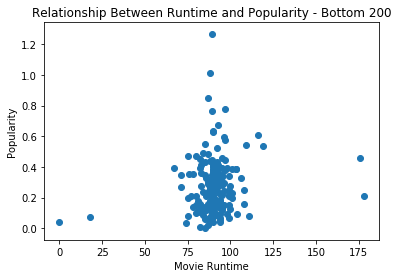

In [43]:
#x & y labels of scatter plot
plt.xlabel('Movie Runtime')
plt.ylabel('Popularity')

#title of scatter plot
plt.title('Relationship Between Runtime and Popularity - Bottom 200')


plt.scatter(df_bottom['runtime'],df_bottom['popularity']);

What about the most expensive movies?

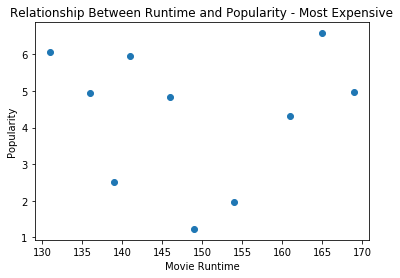

In [44]:
#x & y labels of scatter plot
plt.xlabel('Movie Runtime')
plt.ylabel('Popularity')

#title of scatter plot
plt.title('Relationship Between Runtime and Popularity - Most Expensive')


plt.scatter(df_expensive['runtime'],df_expensive['popularity']);

As we established from the previous questions, most expensive does not always equal highly rated and in this case, it also does not seem to provide high popularity aswell. 

### What if we want to see different ranges for our questions?

Below are two functions that can provide us with more insight depending on the range of data we want to look at.

The first funciton explores the relationship from our first question, "Does a movie's budget affect its rating (vote_average)?" and the second function explores our second question, "Does the popularity of a movie increase or decrease depending on how long the movie is?". 

In [60]:
df['vote_average'].min()

1.5

In [61]:
df['vote_average'].max()

9.1999999999999993

In [62]:
# function groups dataset by rating 
# and the average of X most expensive movies 
# to produce regplots per user input


def regplot_maker():
    x = input()
    temp_df = pd.DataFrame(df.groupby(['vote_average']).mean()['budget'].nlargest(int(x)))
    temp_df = temp_df.reset_index()
    sns.regplot(x="budget", y="vote_average", data=temp_df,scatter_kws={'alpha':0.1},
               line_kws={"color":"red"});
    #x & y labels of regplot
    plt.xlabel('Movie Budget'),
    plt.ylabel('Rating')
    plt.title('Top ' +x+ ' Movies by Budget & Rating');
    

Simply call the function and input a number and you can see the trend is similar to our original findings from earlier in this report.

Let's look at the top 700 movies.

700


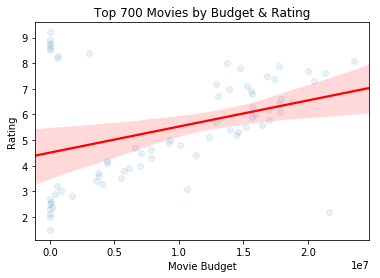

In [55]:
regplot_maker()

What about the top 5 movies?

5


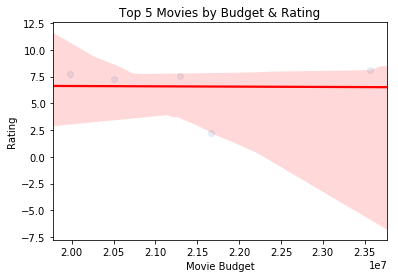

In [56]:
regplot_maker()

And here is our our second funciton explore the varibles runtime and popularity.

In [63]:
# function groups dataset by popularity 
# and the average of X longest movies 
# to produce regplots per user input


def regplot_maker_pop():
    x = input()
    temp_df = pd.DataFrame(df.groupby(['popularity']).mean()['runtime'].nlargest(int(x)))
    temp_df = temp_df.reset_index()
    sns.regplot(x="runtime", y="popularity", data=temp_df,scatter_kws={'alpha':0.1},
               line_kws={"color":"red"});
    #x & y labels of regplot
    plt.xlabel('Movie Runtime')
    plt.ylabel('Popularity')
    plt.title('Top ' +x+ ' Movies by Runtime & Popularity');

Let's look at the top 60 movies for this example.

60


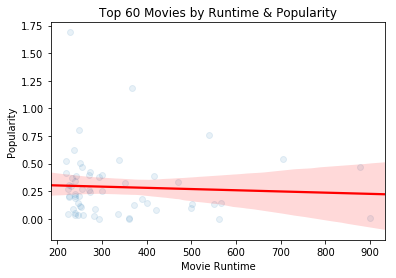

In [58]:
regplot_maker_pop()

Based on our regplot, it seems our results are consistent. A longer movie does not neccesarily mean a popular movie.

Now let's look at the top 6000 movies.

6000


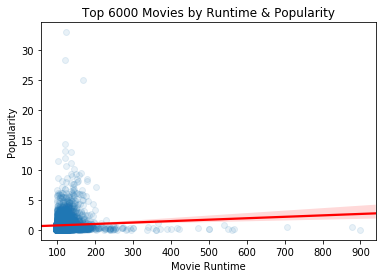

In [59]:
regplot_maker_pop()

Lastly, the top 6000 movie regplot brings our examples to a close. The data continues to suggest, an increase in runtime can negatively effect popularity and the most popular movies range between 100 minutes and 200 minutes. 

<a id='conclusions'></a>
## Conclusions

From the data that we conducted analysis with, we can conclude that large budgets do not equal high ratings or popularity. Additionally, we can conclude that lengthy runtimes do not aid in increasing popularity.


### Limitation

One limitation to the dataset we are exploring is it is dated from the 60s to 2015 and with it currently being 2022, there are plenty of movies missing from our provided dataset. Another limitation is historical context and other factors which could have affected the scores given, we are not able to get a complete picture of the data without that information. For example, the 2008 reccession, going to the movies might have been a luxury not many could afford.

## OPTIONAL: Question for the reviewer
 
If you have any question about the starter code or your own implementation, please add it in the cell below. 

For example, if you want to know why a piece of code is written the way it is, or its function, or alternative ways of implementing the same functionality, or if you want to get feedback on a specific part of your code or get feedback on things you tried but did not work.

Please keep your questions succinct and clear to help the reviewer answer them satisfactorily. 

> **_Your question_**

In [64]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0